Imports

In [15]:
from graph import Graph
from step1 import model_antenna_frequency
from step2 import graph_coloring
from step3 import pulser_MIS
from step4 import pulser_color_graph
from step5 import realistic_pulser_MIS, realistic_pulser_color_graph

**Step 1: Model the problem of antenna frequency**

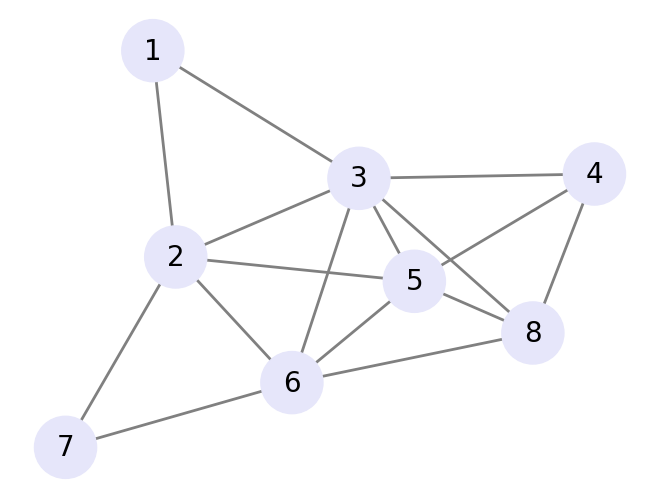

In [16]:
antenna_1 = (0, 0)
antenna_2 = (3, 5.2)
antenna_3 = (6, 0)
antenna_4 = (9, -5.2)
antenna_5 = (9, 0)
antenna_6 = (9, 5.2)
antenna_7 = (9, 10.4)
antenna_8 = (12, 0)

# Create list out of antenna's coordinates
antennas = [antenna_1, antenna_2, antenna_3, antenna_4, antenna_5, antenna_6, antenna_7, antenna_8]
max_interference_distance = 8.7

# Create adjacency list
adjacent_list, vertices = model_antenna_frequency(antennas, max_interference_distance)

# Plot Graph
graph_model = Graph(len(antennas))
graph_model.add_adjacency_list(adjacent_list)
graph_model.visualize() 

**Step 2: Graph Coloring with classical methods**

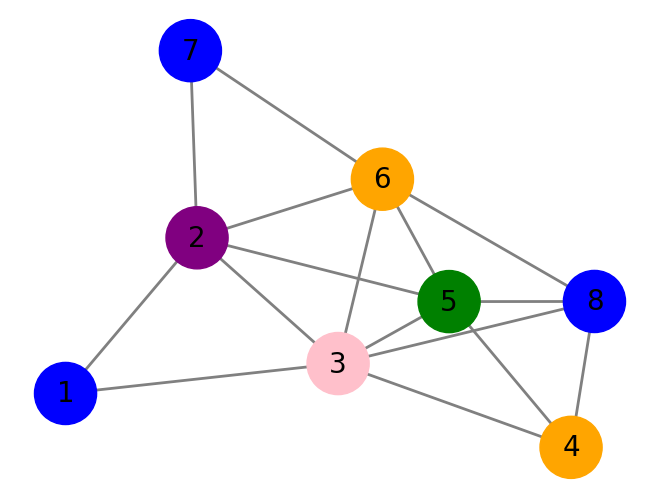

In [17]:
# Create graph
graph_classic = Graph(vertices)

# Create adjacency list (using step1 data)
graph_classic.add_adjacency_list(adjacent_list)

# Color graph by repetitively calling MIS (see step2.py)
graph_classic.color_graph(graph_coloring(adjacent_list, vertices))

# Plot Graph 
graph_classic.visualize()

**Step 3: MIS Solver in Pulser**

In [18]:
# Example with antennas located on a straight line at 5km intervals
antenna_1 = (0, 0)
antenna_2 = (0, 5)
antenna_3 = (0, 10)
antenna_4 = (0, 15)
antenna_5 = (0, 20)

# Create list out of antenna's coordinates
antennas_2 = [antenna_1, antenna_2, antenna_3, antenna_4, antenna_5]
maximum_interference_distance = 5

active_qubits = list(range(len(antennas_2)))

# MIS (see step3.py)
mis_1 = pulser_MIS(antennas_2, maximum_interference_distance)

# Remove the colored antennas
active_qubits = [i for i, bit in enumerate(mis_1) if bit == '0' and i in active_qubits]

# MIS
mis_2 = pulser_MIS(antennas_2, maximum_interference_distance, active_qubits)

# Remove the colored antennas
active_qubits = [i for i, bit in enumerate(mis_2) if bit == '0' and i in active_qubits]

Counter({'10101': 448, '10001': 183, '10100': 95, '00101': 90, '01001': 47, '01010': 46, '10010': 45, '00001': 22, '10000': 21, '00100': 2, '00000': 1})
Maximum Independent Set: [1, 3, 5]
Counter({'11': 763, '10': 122, '01': 107, '00': 8})
Maximum Independent Set: [2, 4]


**Step 4: Graph Coloring in Pulser**

Counter({'10010010': 667, '10000011': 332, '10000010': 1})
Maximum Independent Set: [1, 4, 7]
Counter({'10001': 1000})
Maximum Independent Set: [2, 8]
Counter({'001': 370, '100': 355, '010': 275})
Maximum Independent Set: [6]
Counter({'10': 537, '01': 463})
Maximum Independent Set: [3]
Counter({'1': 1000})
Maximum Independent Set: [5]


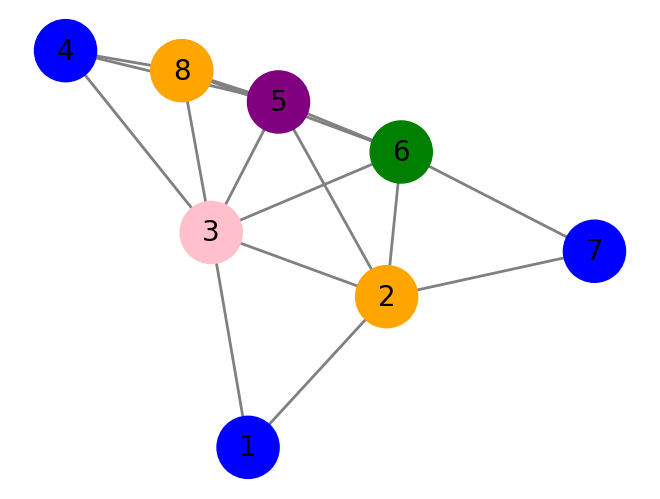

In [19]:
# Using the coordinates of the antenna from step 1

adjacent_list = model_antenna_frequency(antennas, max_interference_distance)[0]

# Graph initialization
graph_pulser = Graph(len(antennas))

# Create adjacency list
graph_pulser.add_adjacency_list(adjacent_list)

# Color graph by repetitively calling MIS (see step4.py)
graph_pulser.color_graph(pulser_color_graph(antennas, max_interference_distance))

# Plot Graph
graph_pulser.visualize()



Comparison of output with classical algorithm

In [10]:
# Get unique colors
unique_colors_classic = set(graph_classic.colors.values())
num_colors_classic = len(unique_colors_classic)

unique_colors_pulser = set(graph_pulser.colors.values())
num_colors_pulser = len(unique_colors_pulser)

print(f"The classical graph coloring implementation uses {num_colors_classic} colors")
print(f"The pulser graph coloring implementation uses {num_colors_pulser} colors")

The classical graph coloring implementation uses 5 colors
The pulser graph coloring implementation uses 5 colors


**Step 5: More realistic graph coloring**

MIS only

In [11]:
# Example with antennas located on a straight line at 5km intervals (same entry as step3)
active_qubits = list(range(len(antennas_2)))

# MIS (see step5.py)
mis_1 = realistic_pulser_MIS(antennas_2, maximum_interference_distance)

# Remove the colored antennas
active_qubits = [i for i, bit in enumerate(mis_1) if bit == '0' and i in active_qubits]

# MIS
mis_2 = realistic_pulser_MIS(antennas_2, maximum_interference_distance, active_qubits)

# Remove the colored antennas
active_qubits = [i for i, bit in enumerate(mis_2) if bit == '0' and i in active_qubits]

Counter({'10101': 349, '10001': 144, '10100': 112, '00101': 101, '00100': 61, '00001': 53, '00010': 42, '10000': 42, '10011': 24, '01010': 21, '10111': 19, '10010': 16, '11001': 16})
10101
Maximum Independent Set: [1, 3, 5]
Counter({'11': 712, '10': 151, '01': 98, '00': 39})
11
Maximum Independent Set: [2, 4]


Graph Coloring

In [13]:
# Same coordinates as in the previous step, except that the last coordinate has been removed
# Unable to emulate our noise configuration for more than 7 qubits
antenna_1 = (0, 0)
antenna_2 = (3, 5.2)
antenna_3 = (6, 0)
antenna_4 = (9, -5.2)
antenna_5 = (9, 0)
antenna_6 = (9, 5.2)
antenna_7 = (9, 10.4)


# Create list out of antenna's coordinates
antennas = [antenna_1, antenna_2, antenna_3, antenna_4, antenna_5, antenna_6, antenna_7]
max_interference_distance = 8.7

# Create adjacency list
adjacent_list, vertices = model_antenna_frequency(antennas, max_interference_distance)

Counter({'1001001': 632, '0001001': 134, '1001000': 108, '1000001': 63, '1011001': 44, '1001011': 19})
1001001
Maximum Independent Set: [1, 4, 7]
Counter({'0010': 389, '1000': 346, '0000': 157, '0100': 60, '0001': 32, '1010': 16})
0010
Maximum Independent Set: [5]
Counter({'100': 408, '001': 326, '010': 155, '000': 68, '011': 26, '101': 17})
100
Maximum Independent Set: [2]
Counter({'10': 467, '01': 398, '00': 135})
10
Maximum Independent Set: [3]
Counter({'1': 783, '0': 217})
1
Maximum Independent Set: [6]


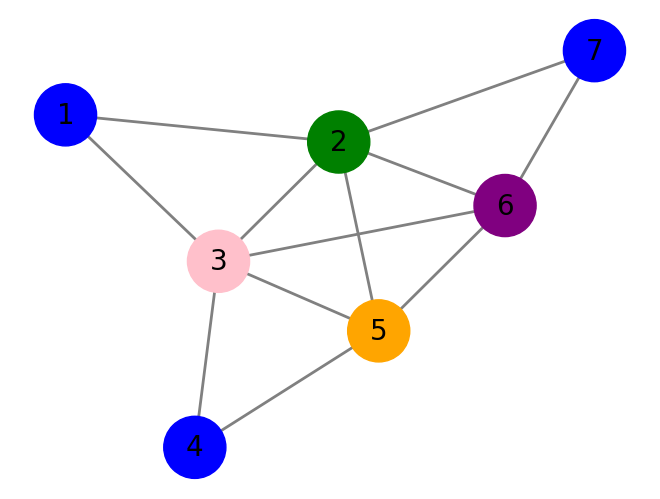

In [14]:
# Graph initialization
graph_pulser = Graph(len(antennas))

# Create adjacency list
graph_pulser.add_adjacency_list(adjacent_list)

# Color graph by repetitively calling MIS (see step5.py)
graph_pulser.color_graph(realistic_pulser_color_graph(antennas, max_interference_distance))

# Plot Graph
graph_pulser.visualize()